#  Stress Level Prediction Project (OOP with ML)

This notebook uses Stress level prediction using **Machine Learning** and **Object-Oriented Programming (OOP)** principles.

---

##  Step 1: Import Required Libraries

Below are the essential libraries and their purposes:
- `pandas`: Data manipulation
- `matplotlib` & `seaborn`: Visualization
- `pickle`: Save/load trained ML models
- `sklearn`: Machine learning tools (SVM, train-test split)


In [6]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING AND UNDERSTANDING ##

In [7]:

# --- DATA LOADING & UNDERSTANDING ---
class DataLoader:
    """
    A class to load data from a CSV file using pandas.
    """
    def __init__(self, filepath):
        """
        Constructor that loads data from the given CSV file path.

        Parameters:
        filepath (str): The path to the CSV file.
        """
        self.df = pd.read_csv(filepath)
        print("Data Loaded.\n")

    def get_data(self):
        """
        Returns the loaded DataFrame.

        Returns:
        pd.DataFrame: The data loaded from the CSV file.
        """
        return self.df

    def display_head(self, n=5):
        """
        Returns the first n rows of the DataFrame.

        Parameters:
        n (int): Number of rows to return (default is 5).

        Returns:
        pd.DataFrame: First n rows of the dataset.
        """
        return self.df.head(n)

    def display_tail(self, n=5):
        """
        Returns the last n rows of the DataFrame.

        Parameters:
        n (int): Number of rows to return (default is 5).

        Returns:
        pd.DataFrame: Last n rows of the dataset.
        """
        return self.df.tail(n)

    def description(self):
        """
        Returns descriptive statistics of the DataFrame.

        Returns:
        pd.DataFrame: Summary including count, mean, std, min, max, etc.
        """
        return self.df.describe()

    def display_info(self):
        """
        Displays information about the DataFrame (columns, data types, memory usage).
        """
        self.df.info()



## DATA PREPROCESSING ##

In [8]:
# --- DATA PREPROCESSING ---
class DataPreprocessor:
    """
    A class to preprocess a pandas DataFrame.
    """
    def __init__(self, dF):
        """
        Initializes with a DataFrame.

        Parameters:
        dF (pd.DataFrame): The data to be preprocessed.
        """
        self.df = dF

    def check_missing_values(self):
        """
        Checks for missing (null) values in the DataFrame.

        Returns:
        pd.Series: Count of missing values per column.
        """
        return self.df.isnull().sum()

    def fill_missing(self):
        """
        Fills missing (NaN) values in numeric columns with the column mean.
        This modifies the DataFrame in place and does not return anything.
        """
        # Ensure only numeric columns are selected for mean calculation
        numeric_cols = self.df.select_dtypes(include=np.number).columns
        self.df[numeric_cols] = self.df[numeric_cols].fillna(self.df[numeric_cols].mean())
        print("Missing values filled (numeric columns by mean).\n")


    def encode_categorical(self):
        """
        Encodes categorical (object type) columns using one-hot encoding.
        Replaces object columns with dummy variables and returns the updated DataFrame.
        If no categorical columns are present, returns the original DataFrame.

        Returns:
        pd.DataFrame: DataFrame with encoded categorical variables.
        """
        object_cols = self.df.select_dtypes(include='object').columns
        if len(object_cols) > 0:
            self.df = pd.get_dummies(self.df, columns=object_cols, drop_first=True)
            print("Categorical columns encoded.\n")
        else:
            print("No categorical columns to encode.\n")
        return self.df



## UNIVARIATE AND BIVARIATE ANALYSIS ##

In [9]:
# --- UNIVARIATE & BIVARIATE ANALYSIS ---
class Analyzer:
    """
    A class for performing data analysis and visualization.
    """
    def __init__(self, df):
        self.df = df

    def univariate(self, column):
        """
        Performs univariate analysis on a given column.
        Displays value counts and a histogram with KDE.

        Parameters:
        column (str): The column to analyze.
        """
        if column not in self.df.columns:
            print(f"Column '{column}' not found in the DataFrame.")
            return

        print(f"Univariate Analysis for: {column}")
        print(self.df[column].value_counts())
        
        plt.figure(figsize=(8, 5))
        if pd.api.types.is_numeric_dtype(self.df[column]):
            sns.histplot(self.df[column], kde=True)
        else:
            sns.countplot(y=self.df[column], order=self.df[column].value_counts().index)
        
        plt.title(f"Univariate Analysis of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

    def correlation_matrix(self, annot=True, cmap='coolwarm'):
        """
        Plots the correlation matrix heatmap for numerical features.

        Parameters:
        annot (bool): If True, write the data value into each cell.
        cmap (str): Colormap to use for the heatmap.
        """
        # Select only numeric columns for correlation matrix
        numeric_df = self.df.select_dtypes(include=np.number)
        if numeric_df.empty:
            print("No numeric columns found for correlation matrix.")
            return

        corr = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=annot, cmap=cmap, fmt=".2f", linewidths=.5)
        plt.title("Correlation Matrix")
        plt.tight_layout()
        plt.show()



## GRAPHS ##

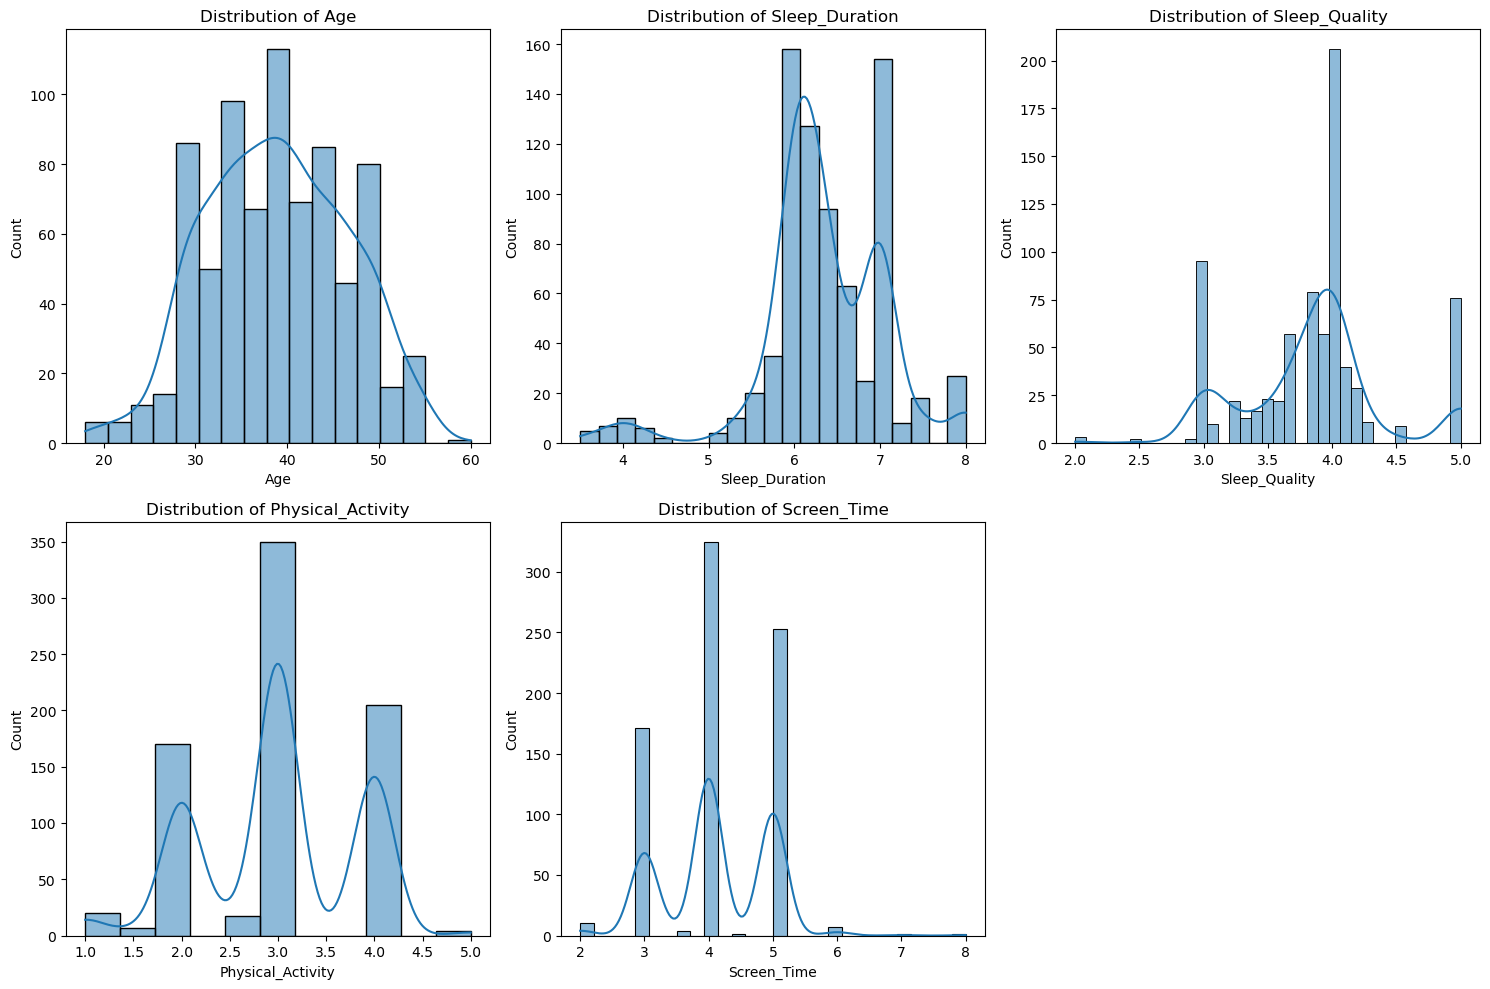

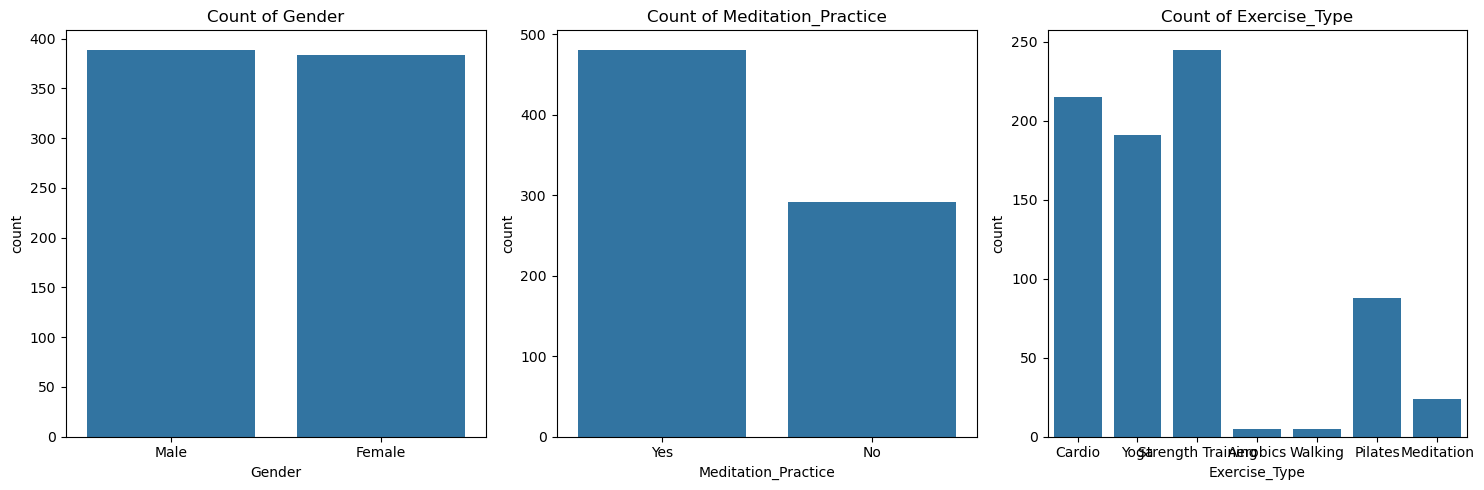

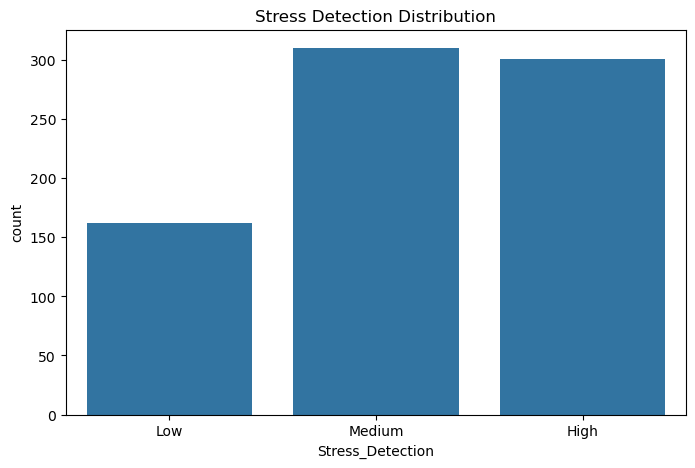

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset here
data = pd.read_csv("stress_detection_data.csv")  

# --- Univariate Analysis ---

# Numeric columns
num_cols = ['Age', 'Sleep_Duration', 'Sleep_Quality', 'Physical_Activity', 'Screen_Time']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Categorical columns
cat_cols = ['Gender', 'Meditation_Practice', 'Exercise_Type']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# Target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Stress_Detection'])
plt.title('Stress Detection Distribution')
plt.show()


In [11]:
# --- GRAPHS (ADAPTED FOR STRESS DATA) ---
class StressGraphs:
    """
    A class for plotting various graphs related to stress detection data.
    """
    def __init__(self, df):
        self.df = df
        sns.set_theme(style="whitegrid")

    def plot_anxiety_vs_stress(self, x='Anxiety_Level', y='Stress_Level', hue=None):
        """
        Displays a scatter plot showing the relationship between Anxiety Level and Stress Level.
        """
        if x not in self.df.columns or y not in self.df.columns:
            print(f"One or more columns ({x}, {y}) not found for plot_anxiety_vs_stress.")
            return

        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=self.df, x=x, y=y, hue=hue)
        plt.title('Anxiety Level vs Stress Level')
        plt.xlabel('Anxiety Level')
        plt.ylabel('Stress Level')
        plt.tight_layout()
        plt.show()

    def plot_depression_vs_stress(self, x='Depression_Score', y='Stress_Level', hue=None):
        """
        Displays a scatter plot showing the relationship between Depression Score and Stress Level.
        """
        if x not in self.df.columns or y not in self.df.columns:
            print(f"One or more columns ({x}, {y}) not found for plot_depression_vs_stress.")
            return

        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=self.df, x=x, y=y, hue=hue)
        plt.title('Depression Score vs Stress Level')
        plt.xlabel('Depression Score')
        plt.ylabel('Stress Level')
        plt.tight_layout()
        plt.show()

    def plot_sleep_quality_vs_stress(self, x='Sleep_Quality', y='Stress_Level', hue=None):
        """
        Displays a scatter plot showing the relationship between Sleep Quality and Stress Level.
        """
        if x not in self.df.columns or y not in self.df.columns:
            print(f"One or more columns ({x}, {y}) not found for plot_sleep_quality_vs_stress.")
            return

        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=self.df, x=x, y=y, hue=hue)
        plt.title('Sleep Quality vs Stress Level')
        plt.xlabel('Sleep Quality')
        plt.ylabel('Stress Level')
        plt.tight_layout()
        plt.show()

    def plot_stress_distribution(self, x='Stress_Level', kde=True, color='lightcoral'):
        """
        Displays a histogram showing the distribution of Stress Levels in the dataset,
        with a KDE curve overlay to visualize the distribution shape.
        """
        if x not in self.df.columns:
            print(f"Column '{x}' not found for plot_stress_distribution.")
            return

        plt.figure(figsize=(8, 5))
        sns.histplot(data=self.df, x=x, kde=kde, color=color)
        plt.title('Stress Level Distribution')
        plt.xlabel('Stress Level')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

    def plot_categorical_vs_stress(self, categorical_col, y='Stress_Level'):
        """
        Displays a box plot comparing the stress distribution across different categories.
        Useful for identifying median, spread, and outliers for categorical features.
        """
        if categorical_col not in self.df.columns or y not in self.df.columns:
            print(f"One or more columns ({categorical_col}, {y}) not found for plot_categorical_vs_stress.")
            return
        
        if pd.api.types.is_numeric_dtype(self.df[categorical_col]):
            print(f"Column '{categorical_col}' is numeric, not suitable for this plot type.")
            return

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df, x=categorical_col, y=y)
        plt.title(f'Stress Level by {categorical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel('Stress Level')
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
        plt.tight_layout()
        plt.show()



## DATA SPLITTING ## 

In [12]:
# --- DATA SPLITTING ---
class DataSplitter:
    """
    A class to split the dataset into training and testing sets.
    """
    def __init__(self, df):
        self.df = df

    def split(self, target_col, test_size=0.2, random_state=42):
        """
        Splits the data into features (X) and target (y), then into training and testing sets.

        Parameters:
        target_col (str): The name of the target column.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for random number generator. Default is 42.

        Returns:
        tuple: X_train, X_test, y_train, y_test
        """
        if target_col not in self.df.columns:
            raise ValueError(f"Target column '{target_col}' not found in the DataFrame.")

        X = self.df.drop(target_col, axis=1)
        y = self.df[target_col]

        # Handle cases where target variable might have a single unique value
        if y.nunique() == 1:
            print(f"Warning: Target column '{target_col}' has only one unique value. Splitting may not be meaningful.")
            # Forcing a split even with one unique value, but it's important to note this.
            # In a real scenario, this might indicate an issue with the data or target selection.

        return train_test_split(X, y, test_size=test_size, random_state=random_state)



## MODELTRAIN SVM ##

In [13]:
# --- MODEL TRAIN (SVM) ---
class StressModel:
    """
    A class to build and train a stress prediction model using Support Vector Regression.
    """
    def __init__(self):
        # Initializing SVR with a linear kernel as per the original logic
        self.model = SVR(kernel='linear')

    def train(self, X_train, y_train):
        """
        Trains the SVR model on the provided training data.

        Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Target values for training.

        Returns:
        model: The trained SVR model.
        """
        print("Training model...")
        self.model.fit(X_train, y_train)
        print("Model training complete.\n")
        return self.model



## EVALUATE MODEL ##

In [14]:
# --- EVALUATE MODEL ---
class ModelEvaluator:
    """
    A class to evaluate the performance of a regression model.
    """
    def evaluate(self, model, X_test, y_test):
        """
        Evaluates the model using R² Score, MAE, and MSE.

        Parameters:
        model: Trained regression model.
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): True target values.

        Returns:
        dict: Evaluation metrics including R², MAE, and MSE.
        """
        print("Evaluating model...")
        y_pred = model.predict(X_test)
        
        evaluation_metrics = {
            "R2 Score": round(r2_score(y_test, y_pred), 4),
            "MAE": round(mean_absolute_error(y_test, y_pred), 2),
            "MSE": round(mean_squared_error(y_test, y_pred), 2)
        }
        print("Model evaluation complete.\n")
        return evaluation_metrics



## SAVE AS PICKLE ##

In [15]:
# --- MODEL SAVE AS PICKLE ---
class ModelSaver:
    """
    A class to save a trained model to a file using pickle.
    """
    def __init__(self, model, filename='stress_model.pkl'):
        """
        Initializes the model saver.

        Parameters:
        model: Trained model to be saved.
        filename (str): Name of the file to save the model. Default is 'stress_model.pkl'.
        """
        self.model = model
        self.filename = filename

    def save(self):
        """
        Saves the model to the specified file using pickle.

        Returns:
        str: The filename where the model was saved.
        """
        try:
            with open(self.filename, 'wb') as f:
                pickle.dump(self.model, f)
            print(f"Model saved as {self.filename}\n")
            return self.filename
        except Exception as e:
            print(f"Error saving model: {e}")
            return None



## OBJECTS OF ALL CLASSES ##

=== Dataset Information ===
Shape: (773, 22)

First 5 rows:
   Age  Gender         Occupation Marital_Status  Sleep_Duration  \
0   30    Male  Software Engineer         Single             7.0   
1   35  Female  Marketing Manager        Married             6.0   
2   40    Male     Data Scientist       Divorced             7.0   
3   35    Male  Software Engineer         Single             7.0   
4   29  Female            Teacher         Single             8.0   

   Sleep_Quality Wake_Up_Time  Bed_Time  Physical_Activity  Screen_Time  ...  \
0            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
1            3.0      6:00 AM  11:00 PM                1.0          3.0  ...   
2            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
3            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
4            5.0      6:30 AM  10:30 PM                3.0          2.0  ...   

   Smoking_Habit  Work_Hours Travel_Time  Social_I

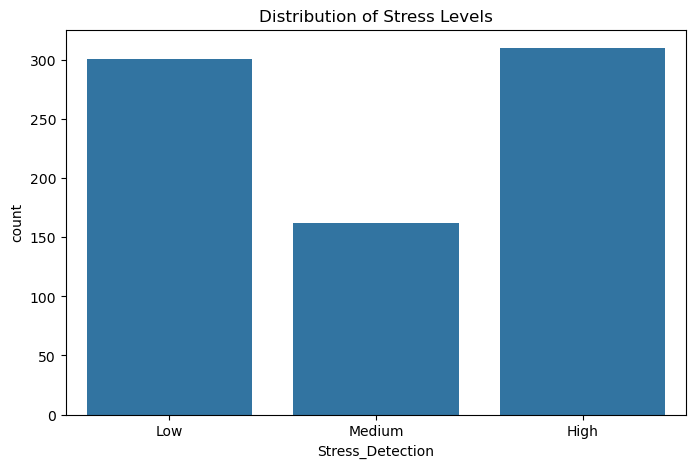

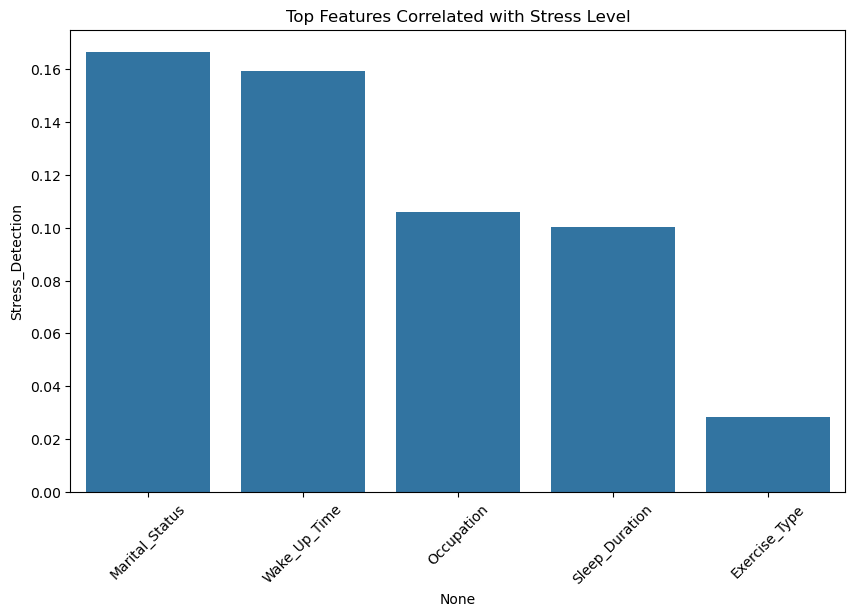

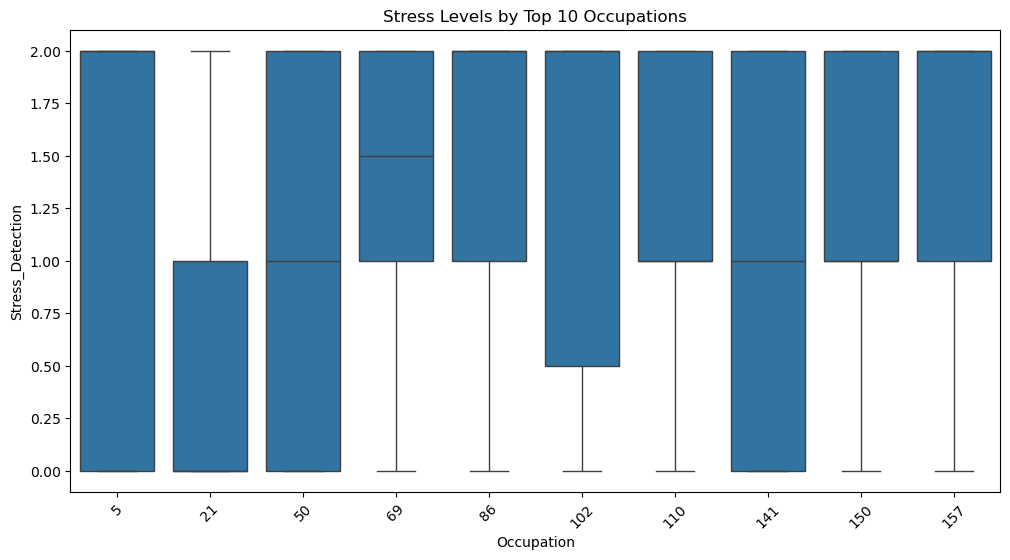

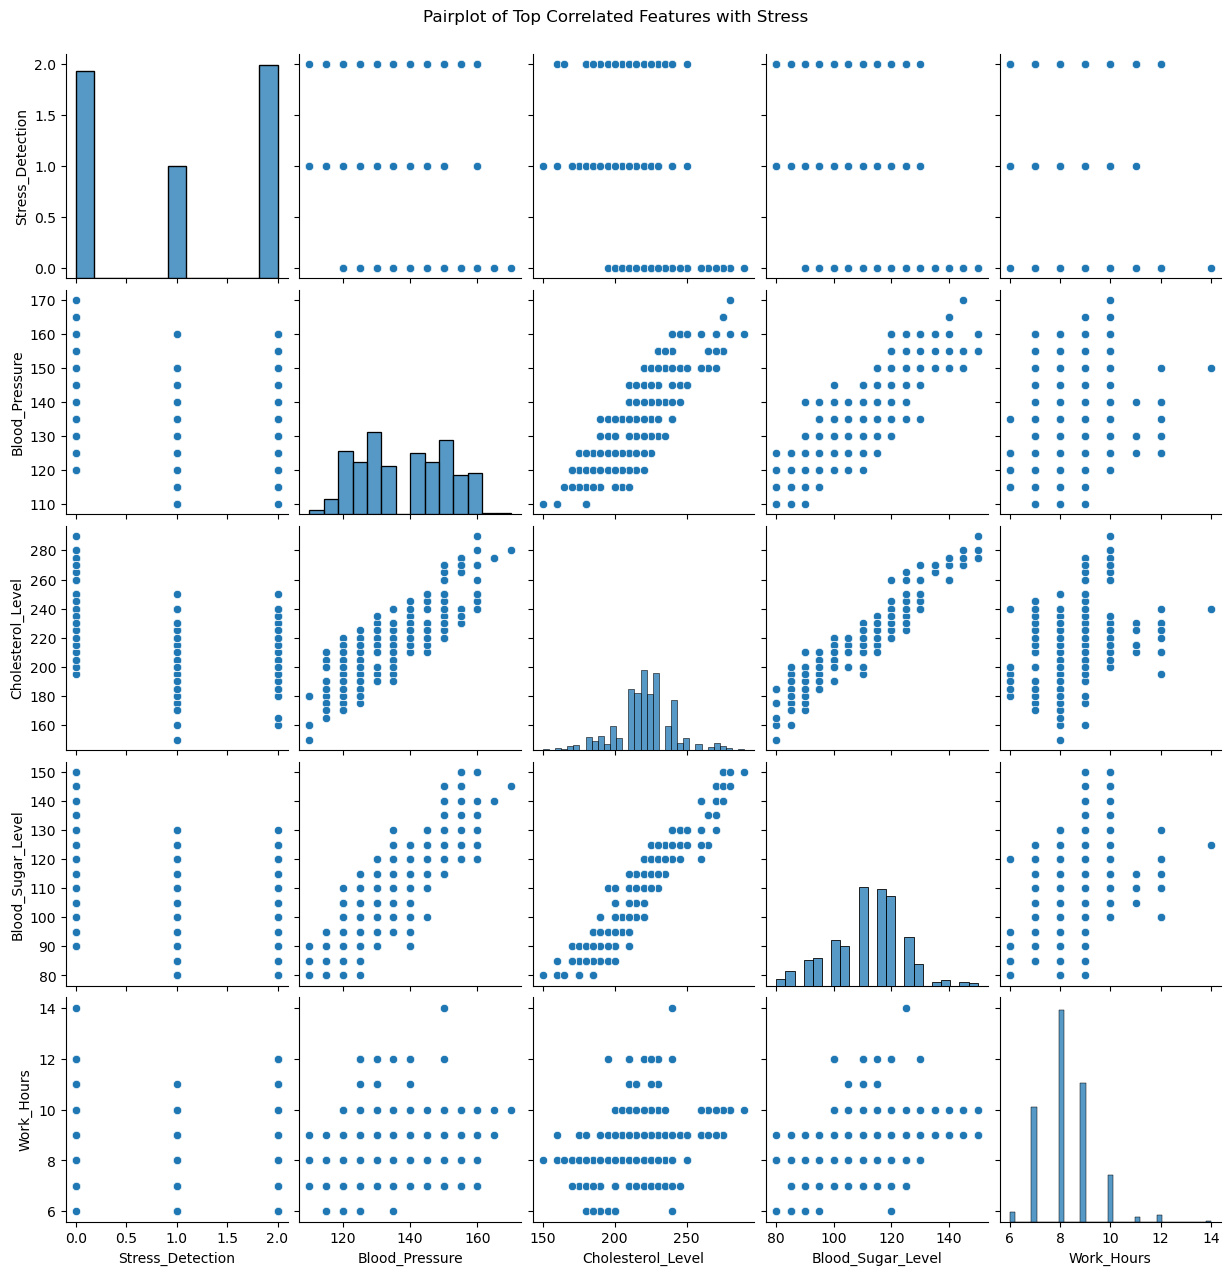


=== Average Values by Stress Level ===
                        Age  Sleep_Duration  Sleep_Quality  Physical_Activity  \
Stress_Detection                                                                
0                 41.485050        6.164784       3.878738           3.435216   
1                 36.123457        6.671605       3.880247           2.570988   
2                 37.809677        6.332903       3.801613           2.750000   

                  Screen_Time  Work_Hours  Blood_Pressure  Cholesterol_Level  \
Stress_Detection                                                               
0                    4.599668    8.647841      145.348837         232.956811   
1                    3.577160    8.080247      128.024691         206.419753   
2                    3.901613    7.974194      135.935484         216.596774   

                  Blood_Sugar_Level  
Stress_Detection                     
0                        119.335548  
1                        103.395062  
2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('stress_detection_data.csv')

# Display basic information
print("=== Dataset Information ===")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and non-null counts:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe(include='all'))

# Data preprocessing
# Convert time columns to datetime and extract hours
df['Wake_Up_Time'] = pd.to_datetime(df['Wake_Up_Time'], format='%I:%M %p').dt.hour
df['Bed_Time'] = pd.to_datetime(df['Bed_Time'], format='%I:%M %p').dt.hour

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Occupation', 'Marital_Status', 'Smoking_Habit', 
                   'Meditation_Practice', 'Exercise_Type', 'Stress_Detection']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Function to show value counts for categorical columns
def show_value_counts(df, cols):
    for col in cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

show_value_counts(df, categorical_cols)

# Correlation analysis
print("\n=== Correlation with Stress Level ===")
correlations = df.corr()['Stress_Detection'].sort_values(ascending=False)
print(correlations)

# Visualization 1: Stress distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Stress_Detection', data=df)
plt.title('Distribution of Stress Levels')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.show()

# Visualization 2: Top correlated features
top_features = correlations.index[1:6]  # Exclude Stress_Detection itself
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=correlations[1:6])
plt.title('Top Features Correlated with Stress Level')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Stress by Occupation (top 10)
top_occupations = df['Occupation'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Stress_Detection', 
           data=df[df['Occupation'].isin(top_occupations)])
plt.title('Stress Levels by Top 10 Occupations')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Pairplot of top correlated features
sns.pairplot(df[['Stress_Detection', 'Blood_Pressure', 'Cholesterol_Level', 
                'Blood_Sugar_Level', 'Work_Hours']])
plt.suptitle('Pairplot of Top Correlated Features with Stress', y=1.02)
plt.show()

# Group analysis by stress level
print("\n=== Average Values by Stress Level ===")
stress_groups = df.groupby('Stress_Detection').mean()
print(stress_groups[['Age', 'Sleep_Duration', 'Sleep_Quality', 'Physical_Activity', 
                    'Screen_Time', 'Work_Hours', 'Blood_Pressure', 
                    'Cholesterol_Level', 'Blood_Sugar_Level']])

# Function to decode encoded values for interpretation
def decode_value(col, val):
    if col in label_encoders:
        return label_encoders[col].inverse_transform([val])[0]
    return val

